# TP3 - VpC1
### Andrés Merli

Encontrar el logotipo de la gaseosa dentro de las imágenes provistas en
Material_TPs/TP3/images a partir del template Material_TPs/TP3/template
1. (4 puntos) Obtener una detección del logo en cada imagen sin falsos positivos
2. (4 puntos) Plantear y validar un algoritmo para múltiples detecciones en la imagen
coca_multi.png con el mismo témplate del item1
3. (2 puntos) Generalizar el algoritmo del item 2 para todas las imágenes.
Visualizar los resultados con bounding boxes en cada imagen mostrando el nivel de confianza
de la detección.

In [9]:
#%matplotlib inline  

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

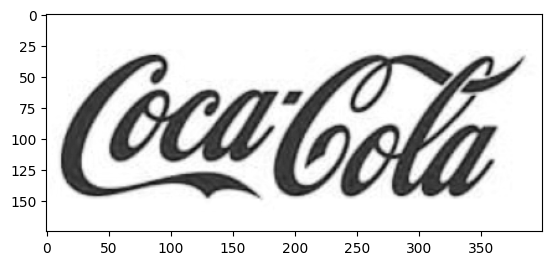

In [10]:
# Levantamos el Template
template = cv.imread('template/pattern.png', cv.IMREAD_GRAYSCALE)
plt.imshow(template, cmap='gray')

In [11]:
lista_nombres = ['coca_logo_1.png', 'coca_logo_2.png', 'coca_multi.png', 'coca_retro_1.png', 'coca_retro_2.png', 'COCA-COLA-LOGO.jpg', 'logo_1.png']

In [12]:
lista_imagenes = []
for name in lista_nombres:
    img = cv.imread('images/'+name)
    img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    lista_imagenes.append(img_rgb)

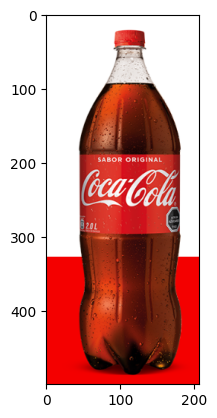

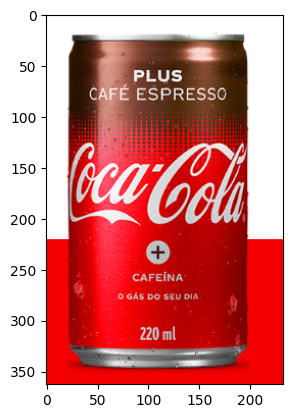

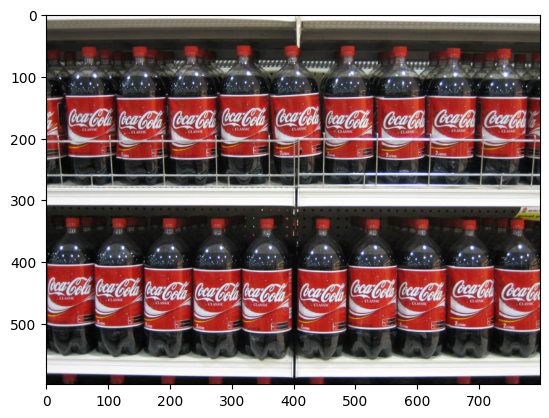

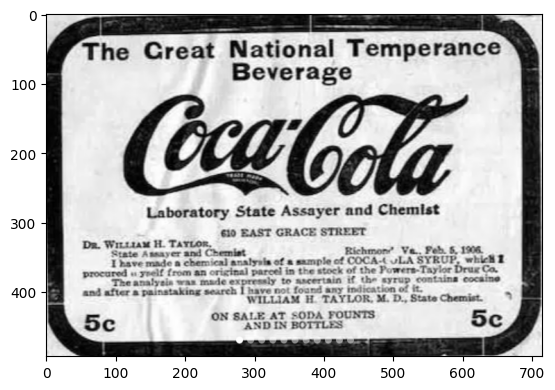

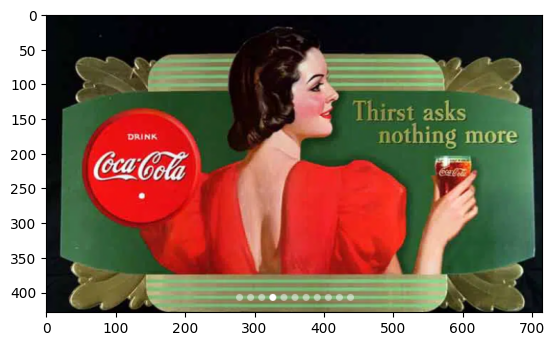

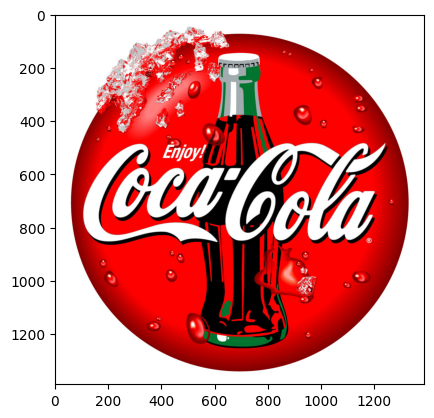

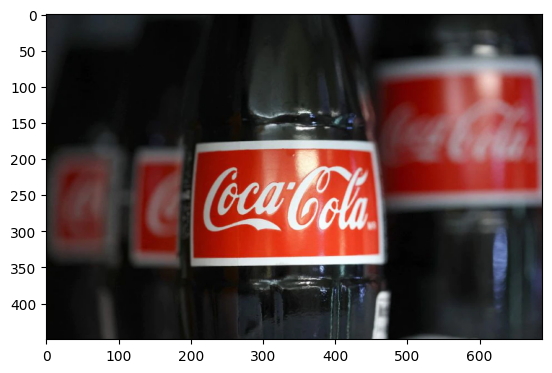

In [13]:
for img in lista_imagenes:
    plt.imshow(img)
    plt.show()

In [15]:
# Paso todas las imagenes a escala de grises
lista_imagenes_gray = []
for img in lista_imagenes:
    img_gray= cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    lista_imagenes_gray.append(img_gray)
    

#### Detección de 1 logo por cada imagen

In [ ]:
w, h = template.shape[::-1]
# Los 6 métodos posibles para comparación:
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']


for meth in methods:
    # Hago una copia de la imagen porque ciclo a ciclo le dibujo rectángulos
    img_salida = img_rgb.copy()
    
    method = eval(meth)
    
    # Aplicamos la coincidencia de patrones
    #--------------------------------------
    res = cv.matchTemplate(img_gray, template, method)
    
    # Encontramos los valores máximos y mínimos
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    
    # Si el método es TM_SQDIFF o TM_SQDIFF_NORMED, tomamos el mínimo
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    
    # Marcamos el lugar donde lo haya encontrado
    #----------------------------------------
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv.rectangle(img_salida,top_left, bottom_right, 255, 2)
    
    # Graficamos el procesamiento y la salida
    #----------------------------------------
    plt.figure()
    
    # Resultado de coincidencia
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    
    # Imagen original con recuadros
    plt.subplot(122),plt.imshow(img_salida)
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    
    plt.suptitle(meth)
    plt.show()

#### 1. Bajamos resolución con pirámides (Gaussianas)

In [ ]:
print('\nTamaño imagen: {} pix'.format(img.shape))

#Nivel 1
img_nivel_1 = cv.pyrDown(img)
print('\nTamaño imagen: {} pix'.format(img_nivel_1.shape))

#Nivel 2
img_nivel_2 = cv.pyrDown(img_nivel_1)
print('\nTamaño imagen: {} pix'.format(img_nivel_2.shape))

#Nivel 3
img_nivel_3 = cv.pyrDown(img_nivel_2)
print('\nTamaño imagen: {} pix'.format(img_nivel_3.shape))

# Muestro los resultados
cv.imshow("Imagen Original", img)
cv.imshow("Imagen Nivel 1", img_nivel_1)
cv.imshow("Imagen Nivel 2", img_nivel_2)
cv.imshow("Imagen Nivel 3", img_nivel_3)

#### Otra forma de modificar la resolucion (util para downscaling o upscaling con escala arbitraria)

In [ ]:
img = cv.imread('origami.jpg')
print(f'Tamaño original: {img.shape}')

scales = np.linspace(0.5, 2, 5)
resized_imgs = list()

# generamos nuestra "piramide" de tamaños arbitrarios
print(f'Dimensiones generadas:')
for scale in scales:
    resized_imgs.append(cv.resize(img, None, fx=scale, fy=scale))
    print(resized_imgs[-1].shape)

# mostramos las imagenes
for i, img in enumerate(resized_imgs):
    cv.imshow(f'nivel-{i}', img)